In [1]:
import os
os.chdir('..')

In [2]:
from src.utils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
faces, emotions = load_fer2013('dataset/fer2013/fer2013.csv')

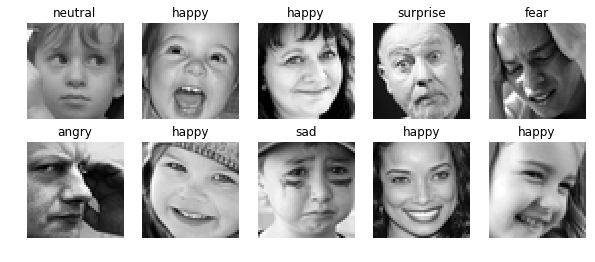

In [4]:
visualize_data(faces, emotions)

In [5]:
from src.emotion_classifier import EmotionClassifier

/home/trivu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
import seaborn as sn
import pandas as pd

In [8]:
labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Evaluate simple cnn

In [18]:
simple_cnn_classifier = EmotionClassifier('simple_cnn', 'GRAY')

In [17]:
predict_emotions = []

In [18]:
for i in range(len(faces)):
    predict_emotions.append(simple_cnn_classifier.predict(faces[i]))

In [21]:
simple_cnn_cm = confusion_matrix(emotions, predict_emotions, labels=labels)

In [23]:
simple_cnn_cm = simple_cnn_cm.astype('float') / simple_cnn_cm.sum(axis=1)[:, np.newaxis]

In [35]:
df_cm = pd.DataFrame(simple_cnn_cm, index = [i for i in labels],
                  columns = [i for i in labels])

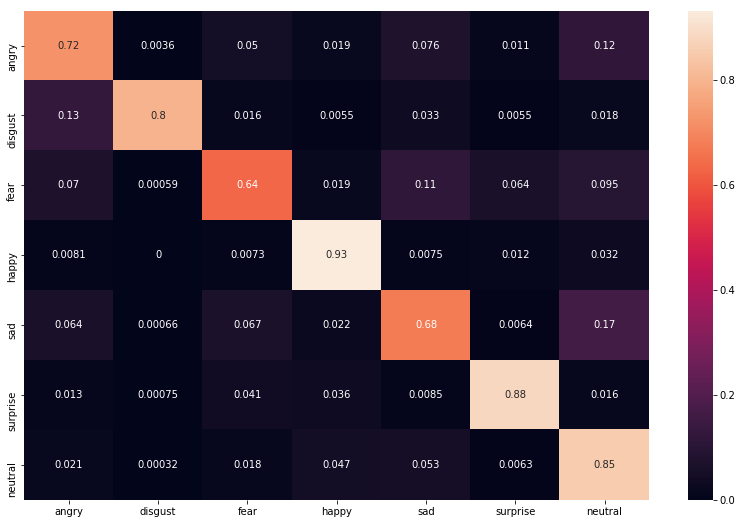

In [39]:
plt.figure(figsize = (14, 9))
sn.heatmap(df_cm, annot=True)
plt.savefig('./report/simple_cnn_cm.png')

# Evaluate mini xception

In [9]:
mini_xception_classifier = EmotionClassifier('mini_xception', 'GRAY')

In [10]:
predicted_emotions = []

In [11]:
for i in range(len(faces)):
    if i % 1000 == 0:
        print("Predict {}/{}".format(i, len(faces)))
    predicted_emotions.append(mini_xception_classifier.predict(faces[i]))

Predict 0/35887
Predict 1000/35887
Predict 2000/35887
Predict 3000/35887
Predict 4000/35887
Predict 5000/35887
Predict 6000/35887
Predict 7000/35887
Predict 8000/35887
Predict 9000/35887
Predict 10000/35887
Predict 11000/35887
Predict 12000/35887
Predict 13000/35887
Predict 14000/35887
Predict 15000/35887
Predict 16000/35887
Predict 17000/35887
Predict 18000/35887
Predict 19000/35887
Predict 20000/35887
Predict 21000/35887
Predict 22000/35887
Predict 23000/35887
Predict 24000/35887
Predict 25000/35887
Predict 26000/35887
Predict 27000/35887
Predict 28000/35887
Predict 29000/35887
Predict 30000/35887
Predict 31000/35887
Predict 32000/35887
Predict 33000/35887
Predict 34000/35887
Predict 35000/35887


In [13]:
mini_xception_cm = confusion_matrix(emotions, predicted_emotions, labels=labels)
mini_xception_cm_normalize = mini_xception_cm.astype('float') / mini_xception_cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(mini_xception_cm_normalize, index = [i for i in labels],
                  columns = [i for i in labels])

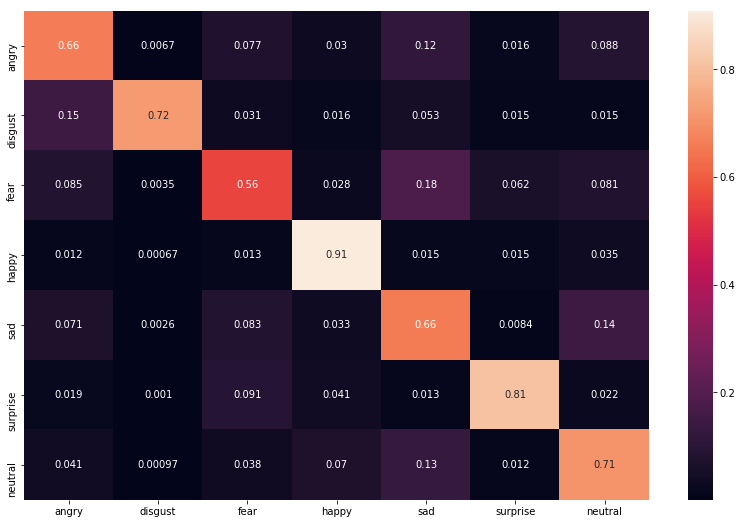

In [14]:
plt.figure(figsize = (14, 9))
sn.heatmap(df_cm, annot=True)
plt.savefig('./report/mini_xception_cm.png')

# Compare

In [17]:
mini_xception_classifier.emotion_classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 62, 62, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 62, 62, 8)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [19]:
simple_cnn_classifier.emotion_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        1600      
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
average_pooling2d_6 (Average (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
__________